# Processamento dos Dados

In [1]:
%run ../services/imports.py
%run ../services/visualization.py
import services.lista_estados_regioes as lesr

importing Jupyter notebook from C:\Users\jeanc\projetos pessoais\project_dataScience_POSCOMP\notebooks\..\services\especialidades.ipynb
importing Jupyter notebook from C:\Users\jeanc\projetos pessoais\project_dataScience_POSCOMP\notebooks\..\services\lista_estados_regioes.ipynb


In [2]:
# Criar instância da classe
visualizacao = Visualizacao()

## POSCOMP

### Dados da Homologação do POSCOMP

In [3]:
dados_homologados = pd.read_csv('../dados/homologacao_poscomp/dados_homologados.csv')

In [4]:
dados_homologados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INSCRICAO   14575 non-null  object
 1   NOME        14575 non-null  object
 2   DATA NASC.  14575 non-null  object
 3   SEXO        14575 non-null  object
 4   ESTADO      14575 non-null  object
 5   ANO         14575 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 683.3+ KB


In [5]:
dados_homologados['ANO'] = dados_homologados['ANO'].astype('object')

In [6]:
# elimina dados pertecentes ao Peru
dados_homologados = dados_homologados.loc[(dados_homologados['ESTADO']) != 'OU']

In [7]:
qtd_sexo = dados_homologados.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')
qtd_sexo['SEXO'] = qtd_sexo['SEXO'].replace({'F': 'Feminino',
                                             'M': 'Masculino'})

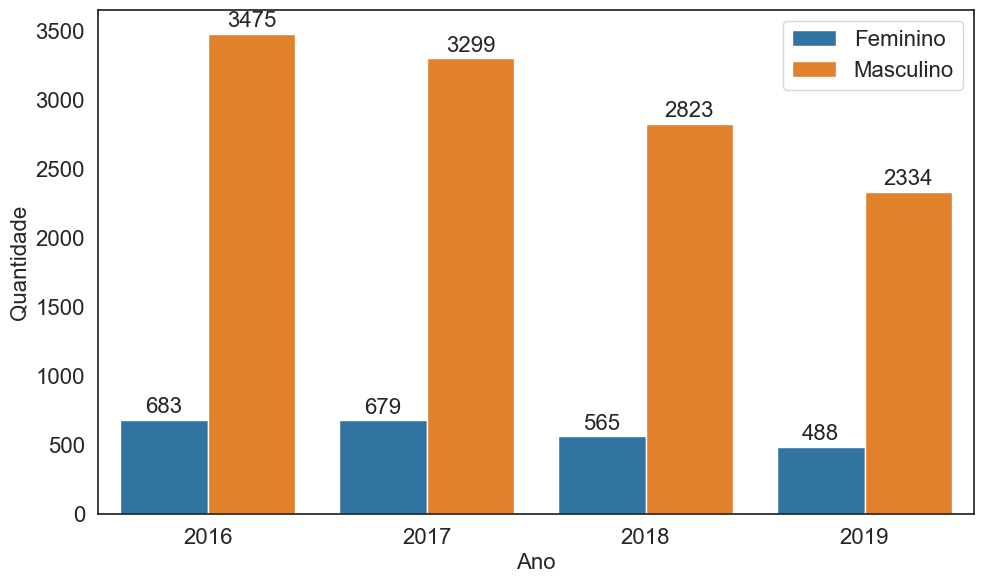

In [8]:
visualizacao.barplot_view(qtd_sexo, x='ANO', y='counts', hue='SEXO', fontsize=16, xlabel='Ano',
                          ylabel='Quantidade', figsize=(10, 6), save_path='../imagens/qtd_candidatosAno.png')

In [9]:
dados_homologados = dados_homologados.set_index('INSCRICAO')

In [10]:
dados_homologados = dados_homologados.drop(columns=['ANO'])

In [11]:
dados_homologados.drop(['688145', 'miamia'], inplace=True)

### Dados das Notas do POSCOMP

In [12]:
dados_notasRespostas = pd.read_csv('../dados/notas_poscomp/dados_notasRespostas.csv')

In [13]:
dados_notasRespostas = dados_notasRespostas.drop_duplicates(subset='INSCRICAO', keep='first')

In [14]:
data_poscomp = pd.merge(dados_homologados, dados_notasRespostas, how='inner', on='INSCRICAO')

In [15]:
qtd_cargo = data_poscomp.groupby(['CARGO']).size().reset_index(name='counts')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


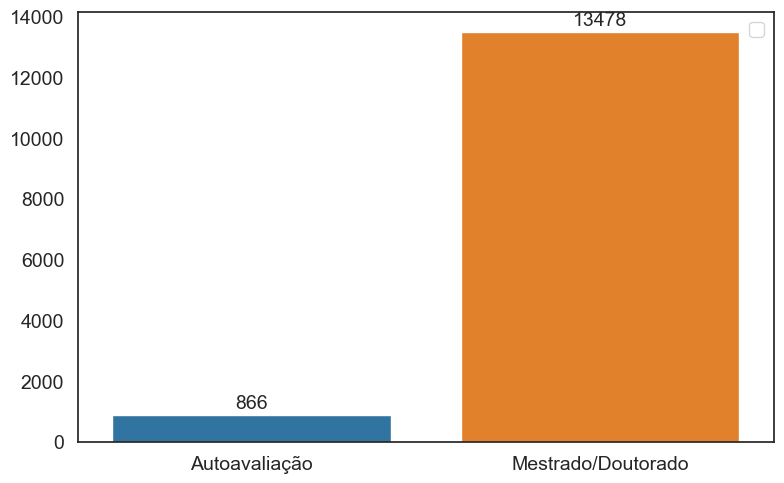

In [16]:
visualizacao.barplot_view(qtd_cargo, x='CARGO', y='counts')

### Realizar estudos por Regiões do Brasil

In [17]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    data_poscomp.loc[data_poscomp['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [18]:
dados_homologados_cp = data_poscomp.copy()

In [19]:
data_poscomp.shape

(14344, 35)

In [20]:
dados_homologados_cp = dados_homologados_cp.dropna() # excluir candidatos inscritos em autovaliação

In [21]:
dados_homologados_cp['REGIAO'].value_counts()

REGIAO
sudeste         4206
sul             2503
nordeste        2470
centro_oeste    1099
norte            699
Name: count, dtype: int64

In [22]:
qtd_regiao = dados_homologados_cp.groupby(['REGIAO']).size().reset_index(name='counts')

In [23]:
porcentagem = qtd_regiao['counts'].to_numpy()
porcentagem = 100 * porcentagem/porcentagem.sum()
porcentagem

array([10.01184294, 22.50159424,  6.36786007, 38.31647991, 22.80222283])

In [24]:
qtd_regiao['Porcentagem regiao'] = porcentagem
qtd_regiao

,REGIAO,counts,Porcentagem regiao
0,centro_oeste,1099,10.011843
1,nordeste,2470,22.501594
2,norte,699,6.367860
3,sudeste,4206,38.316480
4,sul,2503,22.802223


In [25]:
qtd_regiao.style.format({'Porcentagem regiao':'{:.2f}%'})

,REGIAO,counts,Porcentagem regiao
0,centro_oeste,1099,10.01%
1,nordeste,2470,22.50%
2,norte,699,6.37%
3,sudeste,4206,38.32%
4,sul,2503,22.80%


In [26]:
regioes = {
    'norte': 'Norte',
    'nordeste': 'Nordeste',
    'centro_oeste': 'Centro-Oeste',
    'sudeste': 'Sudeste',
    'sul': 'Sul'
}

In [27]:
qtd_regiao_ano = dados_homologados_cp.groupby(['REGIAO', 'ANO']).size().reset_index(name='counts')
qtd_regiao_ano['REGIAO'] = qtd_regiao_ano['REGIAO'].replace(regioes)

In [28]:
qtd_regiao_estado = dados_homologados_cp.groupby(['REGIAO', 'ESTADO']).size().reset_index(name='counts')
qtd_regiao_estado['REGIAO'] = qtd_regiao_estado['REGIAO'].replace(regioes)

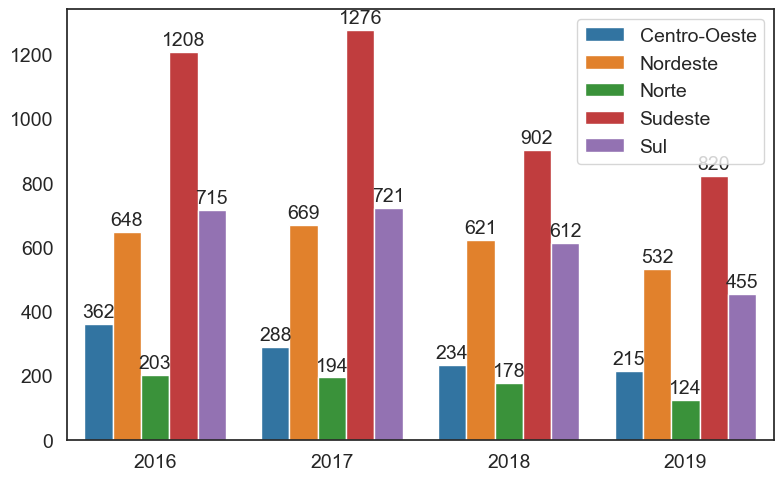

In [29]:
visualizacao.barplot_view(qtd_regiao_ano, x='ANO', y='counts', hue='REGIAO')

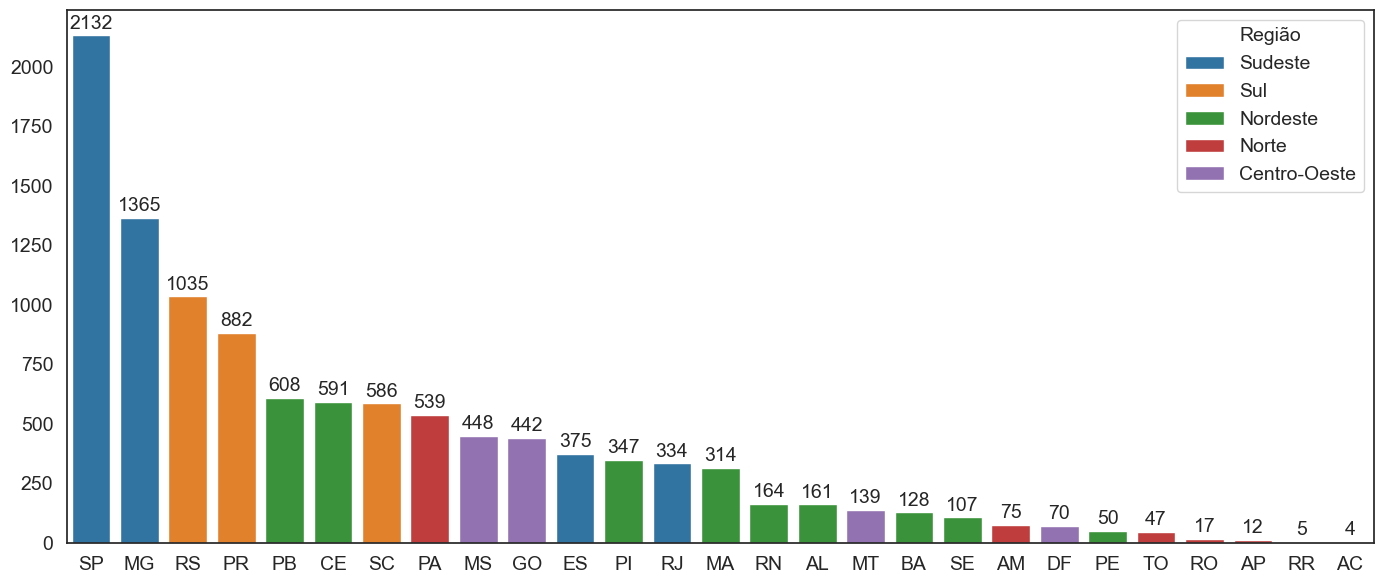

In [30]:
visualizacao.barplot_view(qtd_regiao_estado.sort_values(['counts'], ascending=False), 
                          x='ESTADO', y='counts', hue='REGIAO', figsize=(14,6), dodge=False,title_legend="Região",
                          save_path='../imagens/qtd_região.svg')

In [31]:
qtd_region_gender = dados_homologados_cp.groupby(['REGIAO', 'SEXO']).size().reset_index(name='counts')

In [32]:
region_brazil = {'centro_oeste': 'Centro Oeste', 
                 'nordeste': 'Nordeste', 
                 'norte': 'Norte', 
                 'sudeste': 'Sudeste', 
                 'sul':'Sul'
                }
qtd_region_gender['REGIAO'] = qtd_region_gender['REGIAO'].replace(region_brazil)
qtd_region_gender['SEXO'] = qtd_region_gender['SEXO'].replace({'F': 'Feminino','M': 'Masculino'})

In [33]:
qtd_region_gender

,REGIAO,SEXO,counts
0,Centro Oeste,Feminino,189
1,Centro Oeste,Masculino,910
2,Nordeste,Feminino,412
3,Nordeste,Masculino,2058
4,Norte,Feminino,141
5,Norte,Masculino,558
6,Sudeste,Feminino,746
7,Sudeste,Masculino,3460
8,Sul,Feminino,426
9,Sul,Masculino,2077


In [34]:
region_gender_percent = qtd_region_gender['counts'].to_numpy()
region_gender_percent = 100 * region_gender_percent/region_gender_percent.sum()
region_gender_percent = np.around(region_gender_percent, 2)

In [35]:
qtd_region_gender['Porcentagem regiao'] = region_gender_percent
qtd_region_gender.style.format({'Porcentagem regiao':'{:.2f}%'})

,REGIAO,SEXO,counts,Porcentagem regiao
0,Centro Oeste,Feminino,189,1.72%
1,Centro Oeste,Masculino,910,8.29%
2,Nordeste,Feminino,412,3.75%
3,Nordeste,Masculino,2058,18.75%
4,Norte,Feminino,141,1.28%
5,Norte,Masculino,558,5.08%
6,Sudeste,Feminino,746,6.80%
7,Sudeste,Masculino,3460,31.52%
8,Sul,Feminino,426,3.88%
9,Sul,Masculino,2077,18.92%


In [36]:
qtd_region_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REGIAO              10 non-null     object 
 1   SEXO                10 non-null     object 
 2   counts              10 non-null     int64  
 3   Porcentagem regiao  10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


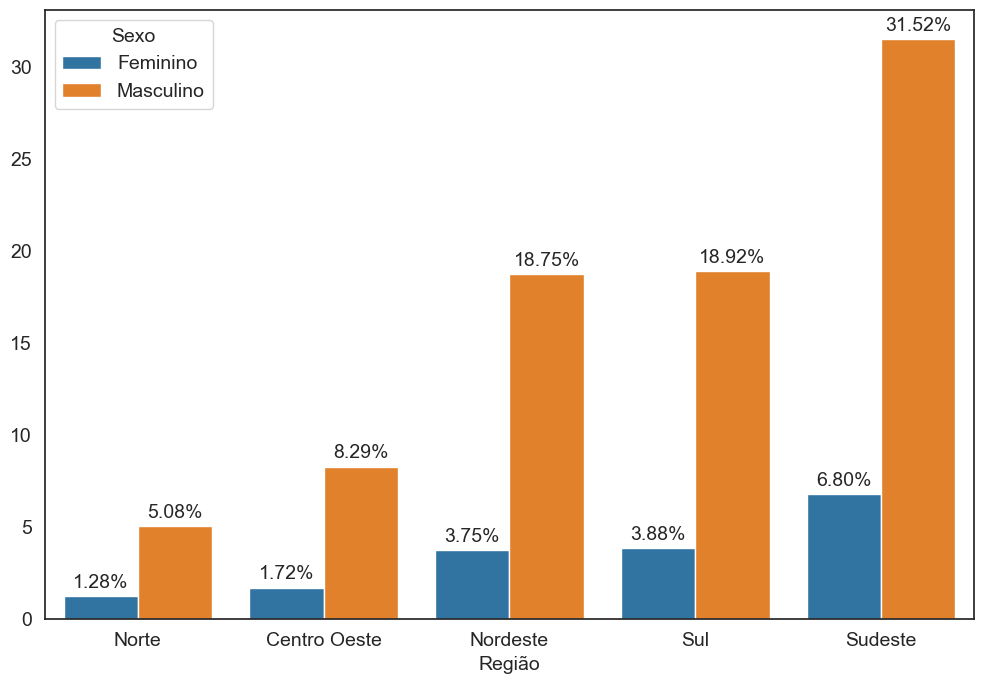

In [37]:
visualizacao.barplot_view_procents(qtd_region_gender.sort_values(['counts'], ascending=True), x='REGIAO', y='Porcentagem regiao', hue='SEXO',
                            xlabel='Região', title_legend='Sexo', figsize=(10,7), save_path='../imagens/qtd_região.png')

### Converter as data de nascimento por idade

In [38]:
from datetime import date

def calculate_age(row):
    birth_year = int(row['DATA NASC.'].split('/')[-1])  # Extrai o ano de nascimento a partir da data de nascimento
    exam_year = row['ANO']  # Obtém o ano da realização da prova
    age = exam_year - birth_year
    return age

# Aplique a função calculate_age ao DataFrame para calcular as idades com base nos anos.
data_poscomp['IDADE'] = data_poscomp.apply(calculate_age, axis=1)

In [39]:
data_poscomp = data_poscomp.drop(columns=['DATA NASC.'])

In [40]:
data_poscomp['IDADE'].min()

-1

In [41]:
data_poscomp = data_poscomp[data_poscomp['IDADE'] >= 18]

## Adicionar os eixos e somar de cada candidato

In [42]:
data_poscomp['matematica'] = data_poscomp.loc[:,['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear',
 'Geometria Analítica', 'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática']].sum(axis=1)

In [43]:
data_poscomp['fund_computacao'] = data_poscomp.loc[:,['Organização de Arquivos e Dados','Técnicas de Programação',
 'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais', 'Arquitetura e Organização de Computadores']].sum(axis=1)

In [44]:
data_poscomp['tec_computacao'] = data_poscomp.loc[:,['Redes de Computadores', 'Computação Gráfica',
                                                   'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos',
                                                   'Compiladores', 'Processamento de Imagens', 'Banco de Dados']].sum(axis=1)

In [45]:
data_poscomp['total'] = data_poscomp['matematica'] + data_poscomp['fund_computacao'] + data_poscomp['tec_computacao']

In [46]:
axis_themes = data_poscomp.dropna()

In [47]:
axis_themes

,INSCRICAO,NOME,SEXO,ESTADO,ESPECIALIDADE,PRESENTE DIA1,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Compiladores,Processamento de Imagens,Banco de Dados,ANO,REGIAO,IDADE,matematica,fund_computacao,tec_computacao,total
0,39401645886-1,ABELARDO VIEIRA MOTA,M,CE,Teoria da Computação,S,Mestrado/Doutorado,3.0,3.0,2.0,...,1.0,1.0,1.0,2016,nordeste,27,14.0,21.0,10.0,45.0
1,39401663587-8,ABNER MATHEUS COSTA DE ARAUJO,M,RS,METODOLOGIA E TÉCNICAS DA COMPUTAÇÃO,S,Mestrado/Doutorado,3.0,2.0,3.0,...,1.0,2.0,1.0,2016,sul,21,16.0,22.0,12.0,50.0
2,39401651770-6,ABNER MOISES DOS SANTOS GOMES,M,SP,ENGENHARIA DE SOFTWARE,S,Mestrado/Doutorado,0.0,1.0,1.0,...,0.0,2.0,1.0,2016,sudeste,25,4.0,16.0,8.0,28.0
3,39401671273-0,ABRAAO DA COSTA SANTANA,M,PA,Modelagem e Gerência de Sistemas de Informação,S,Mestrado/Doutorado,1.0,0.0,1.0,...,1.0,1.0,0.0,2016,norte,30,4.0,13.0,7.0,24.0
5,39401684751-5,ADA RAQUEL DOS SANTOS CRUZ,F,AM,"Computação Gráfica, Imagens e Visualização",S,Mestrado/Doutorado,0.0,0.0,2.0,...,0.0,1.0,1.0,2016,norte,19,6.0,15.0,11.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,51801394883-5,YULLI DIAS TAVARES ALVES,F,MG,Inteligência artificial,S,Mestrado/Doutorado,3.0,2.0,3.0,...,1.0,0.0,1.0,2019,sudeste,22,14.0,16.0,8.0,38.0
14338,51801395371-7,YURE PEREIRA CAMPOS,M,PB,Redes de Computadores e Sistemas Distribuidos,S,Mestrado/Doutorado,1.0,1.0,2.0,...,0.0,1.0,1.0,2019,nordeste,48,10.0,16.0,9.0,35.0
14339,51801394300-3,YURI MATHEUS DIAS PEREIRA,M,SP,"Engenharia de software, Gerenciamento de Infor...",S,Mestrado/Doutorado,1.0,2.0,1.0,...,0.0,1.0,2.0,2019,sudeste,24,9.0,18.0,8.0,35.0
14340,51801396055-5,YURI MORASKI BATISTA,M,ES,Inteligência Computacional,S,Mestrado/Doutorado,1.0,2.0,2.0,...,0.0,1.0,0.0,2019,sudeste,25,10.0,16.0,6.0,32.0


In [48]:
axis_themes = axis_themes.loc[:, ['SEXO','ESTADO','REGIAO','matematica','fund_computacao','tec_computacao', 'total']]

In [49]:
axis_themes.head()

,SEXO,ESTADO,REGIAO,matematica,fund_computacao,tec_computacao,total
0,M,CE,nordeste,14.0,21.0,10.0,45.0
1,M,RS,sul,16.0,22.0,12.0,50.0
2,M,SP,sudeste,4.0,16.0,8.0,28.0
3,M,PA,norte,4.0,13.0,7.0,24.0
5,F,AM,norte,6.0,15.0,11.0,32.0


<Axes: xlabel='SEXO', ylabel='matematica'>

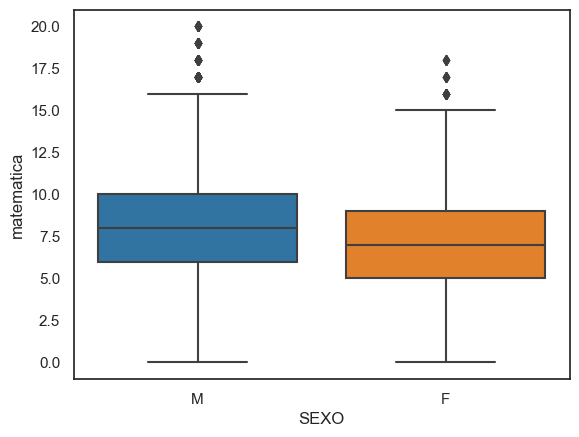

In [50]:
sns.boxplot( x=axis_themes["SEXO"], y=axis_themes["matematica"] )

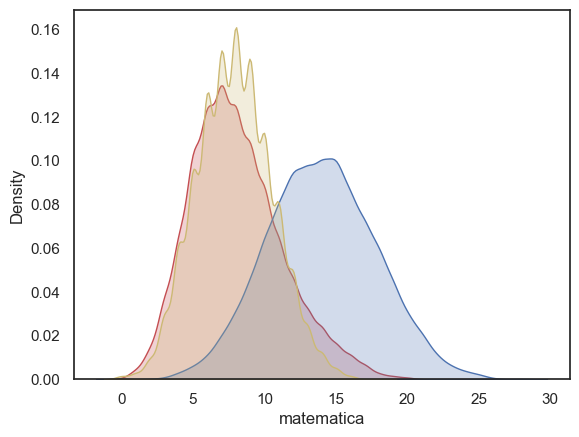

In [51]:
# plotting both distibutions on the same figure
fig = sns.kdeplot(axis_themes['matematica'], shade=True, color="r")
fig = sns.kdeplot(axis_themes['fund_computacao'], shade=True, color="b")
fig = sns.kdeplot(axis_themes['tec_computacao'], shade=True, color="y")
plt.show()

<Axes: ylabel='Frequency'>

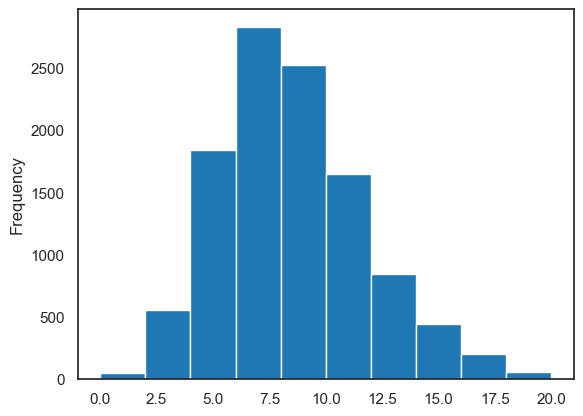

In [52]:
axis_themes['matematica'].plot(kind='hist')

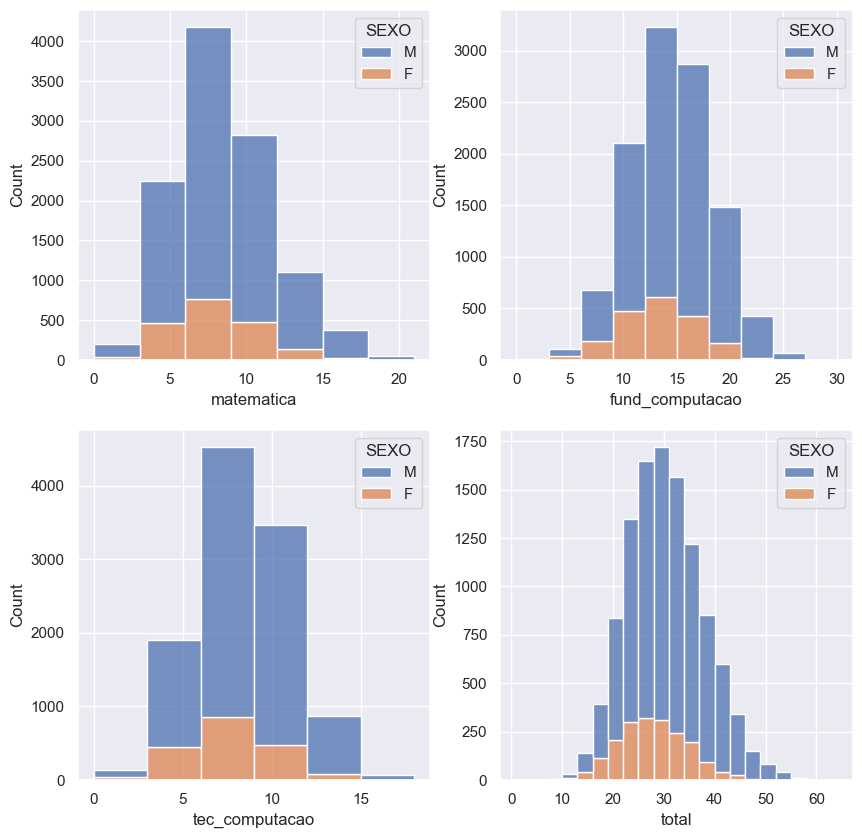

In [53]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=axis_themes, x="matematica", color="skyblue", ax=axs[0, 0],binwidth=3, hue='SEXO',multiple="stack")
sns.histplot(data=axis_themes, x="fund_computacao", color="olive", ax=axs[0, 1],binwidth=3, hue='SEXO',multiple="stack")
sns.histplot(data=axis_themes, x="tec_computacao", color="gold", ax=axs[1, 0],binwidth=3, hue='SEXO',multiple="stack")
sns.histplot(data=axis_themes, x="total", color="teal", ax=axs[1, 1],binwidth=3, hue='SEXO',multiple="stack")

plt.show()

In [54]:
categorica = axis_themes.select_dtypes(include='O')

In [55]:
colors = ['#F2AE55','#FF8A33','#E6835C','#FFAA9C','#F54A4A']

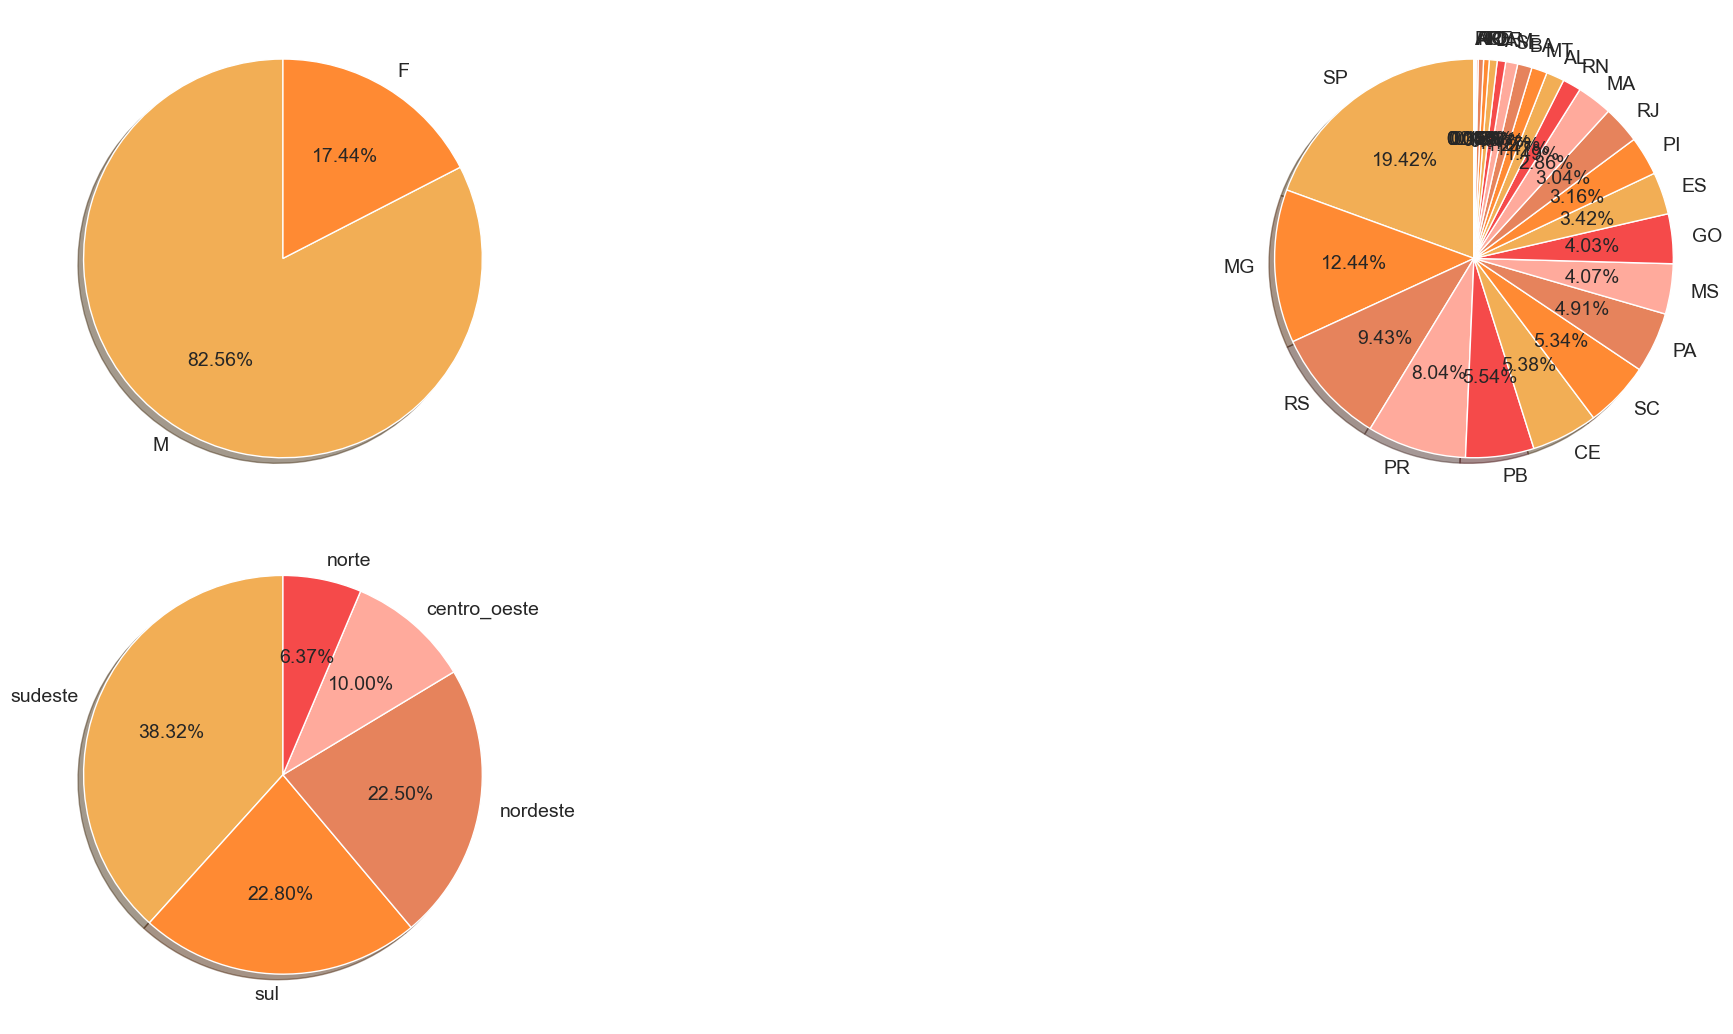

In [56]:
plt.figure(figsize=(24,26))
for i, col in enumerate(categorica):
    axes = plt.subplot(5,2, i + 1)
    plt.pie(axis_themes[col].value_counts(), labels=axis_themes[col].value_counts().index,
            autopct='%.2f%%', shadow=True, startangle=90, colors=colors, textprops={'size':14})
plt.tight_layout()
plt.show()

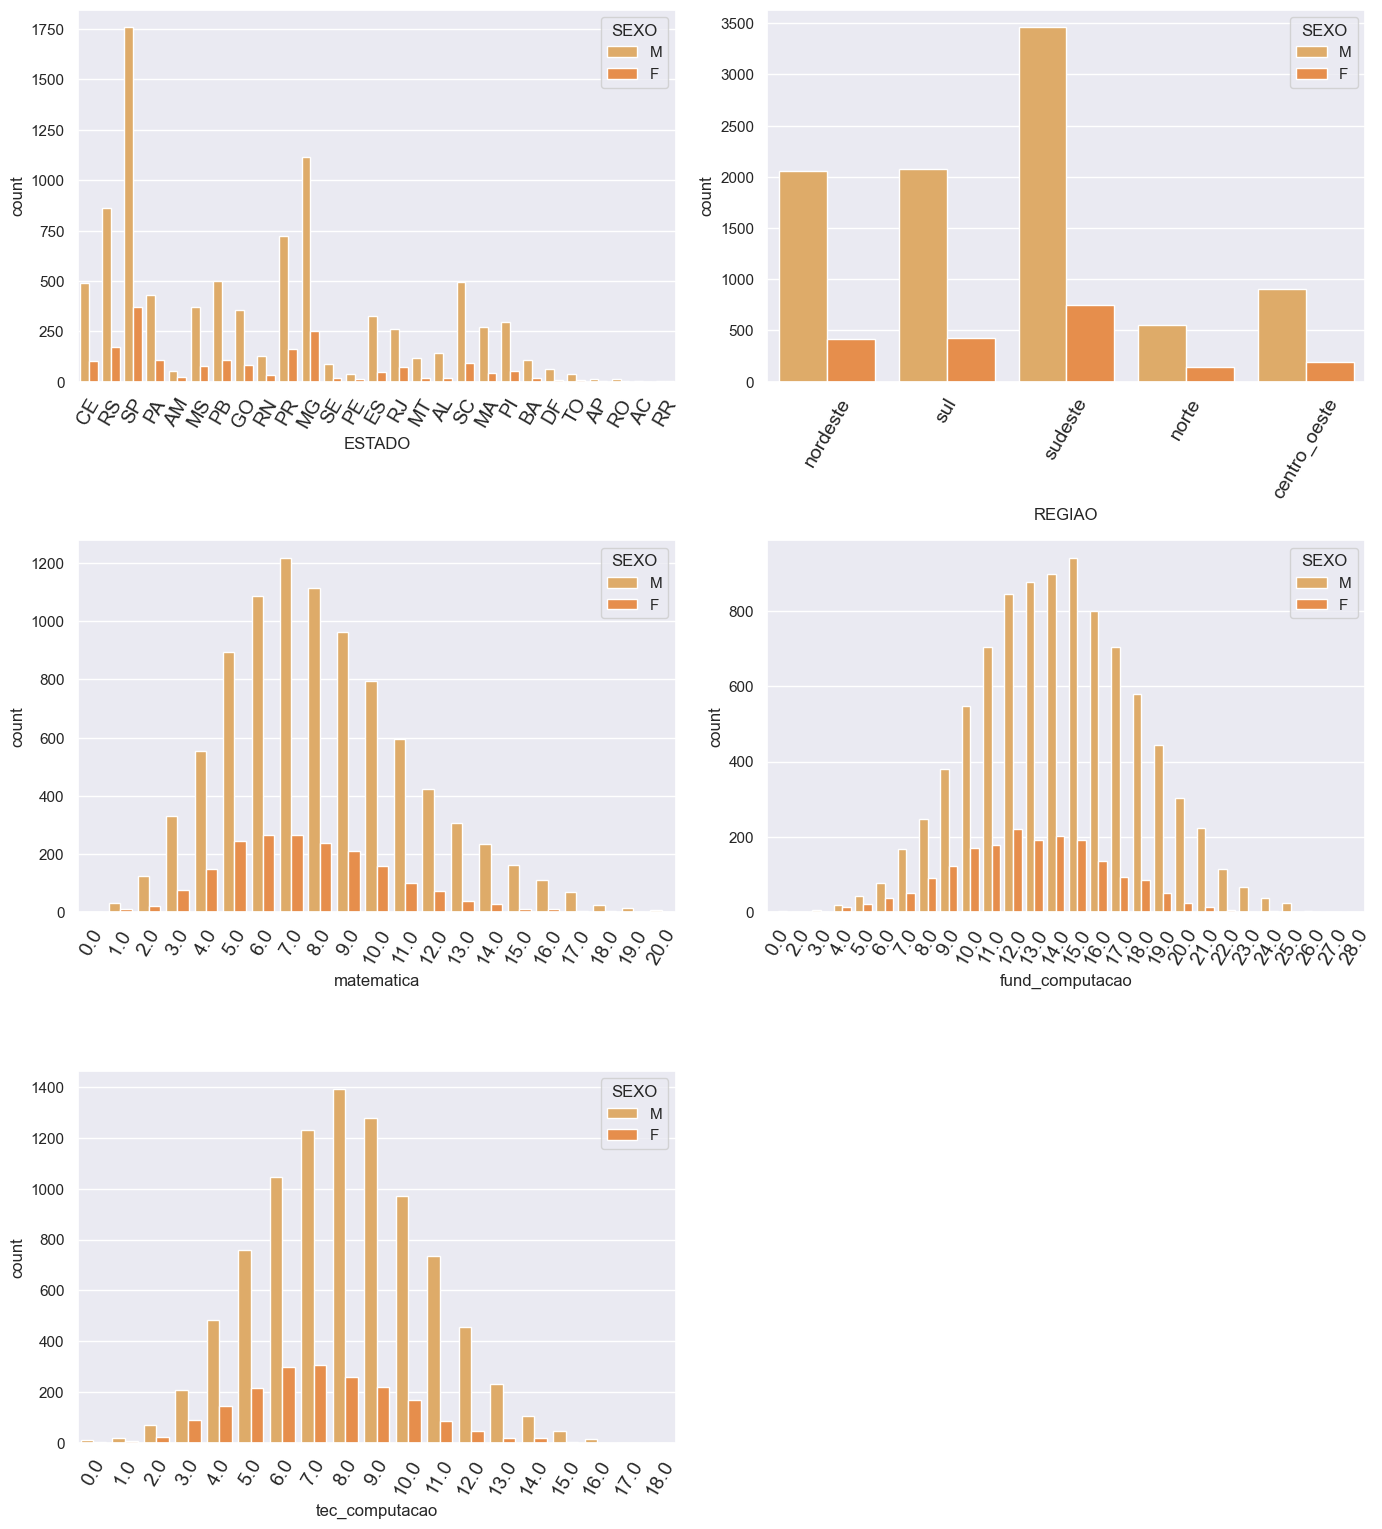

In [57]:
# O gráfico mostra que existem mais homens do que mulheres 
colunas = ['ESTADO','REGIAO', 'matematica', 'fund_computacao', 'tec_computacao']
plt.figure(figsize=(14,20))
for i,col in enumerate(colunas):
    axes = plt.subplot(4,2, i + 1)
    sns.countplot(x=axis_themes[col], hue=axis_themes['SEXO'], palette=colors, ax=axes)
    plt.xticks(rotation=60, fontsize=14)
plt.tight_layout()
plt.show()

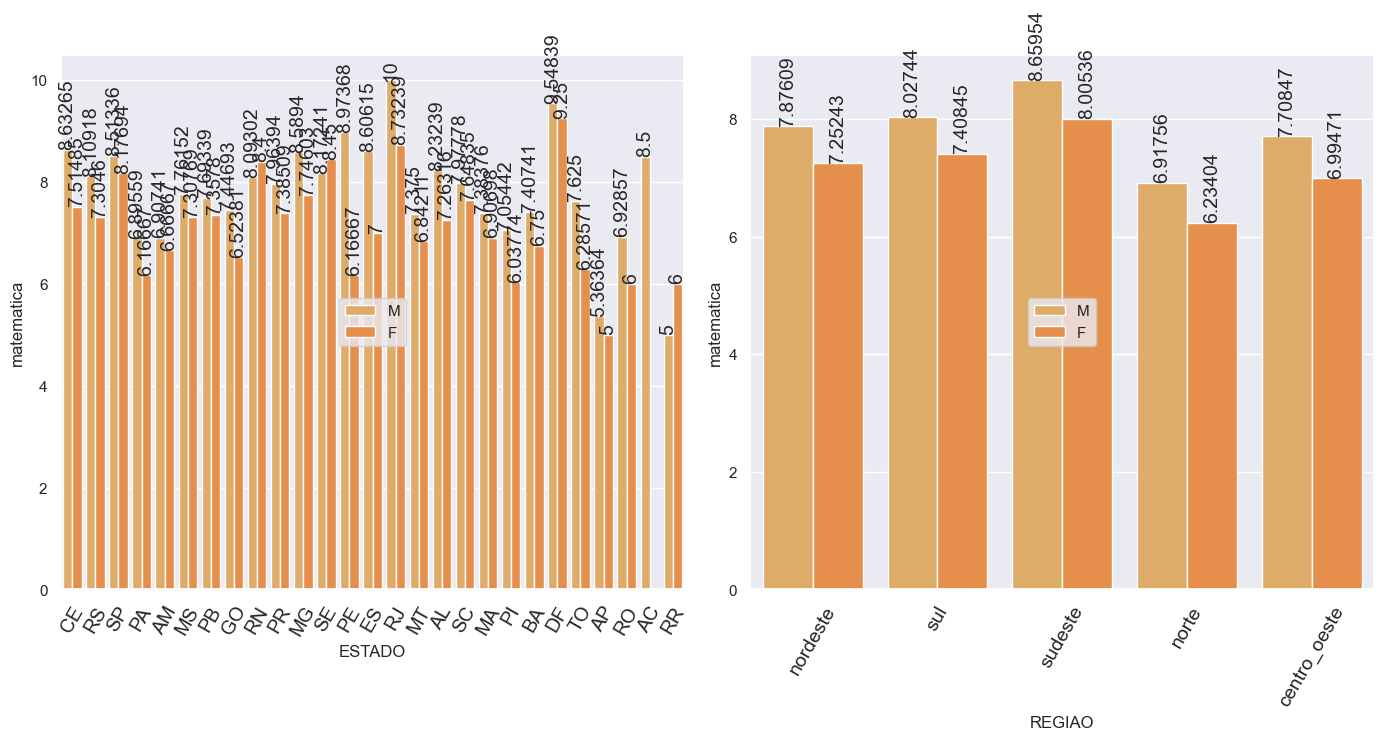

In [58]:
colunas = ['ESTADO','REGIAO']

# Barras
plt.figure(figsize=(14,27))
for i,col in enumerate(colunas):
    axes = plt.subplot(4,2, i + 1)
    sns.barplot(x=axis_themes[col],y=axis_themes['matematica'],hue=axis_themes['SEXO'],palette=colors, ci=None, ax=axes)
    plt.xticks(rotation=60, fontsize=14)
    plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
    plt.legend(loc='center')
    for cont in axes.containers:
        axes.bar_label(cont,fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

In [59]:
g = axis_themes.groupby('ESTADO')

In [60]:
g.describe()['matematica']

,count,mean,std,min,25%,50%,75%,max
ESTADO,,,,,,,,
AC,4.0,8.500000,4.932883,3.0,6.75,8.0,9.75,15.0
AL,161.0,8.118012,2.795932,3.0,6.00,8.0,10.00,15.0
AM,75.0,6.840000,2.444188,2.0,6.00,7.0,8.00,15.0
AP,12.0,5.333333,3.113996,1.0,3.00,4.5,7.25,12.0
BA,128.0,7.304688,2.860424,1.0,5.00,7.0,9.00,15.0
CE,591.0,8.441624,3.232708,1.0,6.00,8.0,10.00,18.0
DF,70.0,9.514286,3.809762,2.0,7.00,9.0,12.00,20.0
ES,375.0,8.392000,3.359628,1.0,6.00,8.0,10.00,19.0
GO,442.0,7.271493,2.918943,0.0,5.00,7.0,9.00,17.0


# Tratamento da especilidade dos candidatos

In [61]:
data_poscomp_esp = data_poscomp.query("ESPECIALIDADE.notnull()")

In [62]:
data_poscomp_esp = data_poscomp_esp[data_poscomp_esp['PRESENTE DIA1'] != 'N']

In [63]:
# Converter todos os elementos para minúsculas
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.lower()

In [64]:
import re

# definir uma expressão regular para encontrar os caracteres '?'
def substituir_caracteres(df, caractere):
    regex = r'\b{}\b'.format(re.escape(caractere))

    # substituir os caracteres '?' por um caractere vazio em todas as linhas da coluna 'Texto'
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].apply(lambda x: re.sub(regex, '', x))
    
    return df

In [65]:
def remover_e(frase):
    if frase.endswith(" e"):
        frase = frase.rstrip(" e")
    # if frase.endswith(" a"):
    #     frase = frase.rstrip(" a")
    return frase

# # Aplicar a função em uma coluna do DataFrame
# dados_disciplinas['ESPECIALIDADE'] = dados_disciplinas['ESPECIALIDADE'].apply(remover_e)

In [66]:
def substituir_palavras(df, palavras_a_substituir, palavra_substituta):
    # Para cada palavra a ser substituída
    for palavra in palavras_a_substituir:
        # Use uma expressão regular para encontrar a palavra inteira e aplicar a substituição
        padrao = r'\b' + re.escape(palavra) + r'\b'
        df['ESPECIALIDADE'] = df['ESPECIALIDADE'].str.replace(padrao, palavra_substituta, regex=True)

    # Retorna o novo DataFrame com as palavras substituídas
    return df

In [67]:
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, '?')
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, '\\')
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, ' \ ')
data_poscomp_esp = substituir_caracteres(data_poscomp_esp, '\ ')

# Remover caracteres "\\"
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r'\\', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r' à', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r'.', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r':', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace(r',', '')
data_poscomp_esp['ESPECIALIDADE'] = data_poscomp_esp['ESPECIALIDADE'].str.replace('\xa0', '')

In [68]:
# # buscando as três primeiras palavras de cada texto sem as vírgulas
# primeiras_palavras = data_poscomp['ESPECIALIDADE'].str.split().apply(lambda x: x[:3])

# # adicionando as palavras como uma nova coluna no dataframe
# data_poscomp['ESPECIALIDADE'] = primeiras_palavras

# # removendo as vírgulas da coluna 'Primeiras Palavras'
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(lambda x: ' '.join(word.replace(',', '') for word in x))

# # imprimindo o dataframe resultante

In [69]:
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(remover_e)

### Junção das especialidades

In [70]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'inteligência computacional e processamento gráfico',
'inteligência computacional',
'inteligência artificial e banco de dados',
'otimização e inteligência artificial',
'lógica inteligência artificial e métodos formais',
'inteligência aplicada',
 'inteligencia computacional',
 'inteligencia artificial',
 'inteligência e modelagem computacional',
'matemática e inteligência artificial',
 'outrasinteligência artificial',
'redes neurais e computação gráfica',
 'sistemas nebulosos e redes neurais artificiais',
'redes neuronais artificiais',
], 'inteligência artificial')

In [71]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'engenharia de software',
 'engenharia de software técnicas de reúso testes e qualidade',
 'engenharia de software banco de dados e informática e educação',
 'engenharia de software e banco de dados',
 'engenharia de software e redes de computadores',
 'engenharia de software e sistemas de informação',
 'engenharia de software e linguagens de programação',
 'engenharia de software e usabilidade',
 'engenharia de software banco de dados e interação humano computador',
 'engenharia de software e sistemas de informação/sistemas web e multimídia interativos',
 'engenharia de software e sistemas de computação',
 'engenharia de software experimental',
 'engenharia de software gerenciamento de informações e interfaces homem-computador',
 'engenharia de software e linguagens de programacao',
 'engenharia de software e sistemas computacionais',
 'engenharia de software e sistemas de informação / sistemas web e multimídia interativos',
 'engenharia de software baseada em buscas',
 'engenharia de software e linguagens de programacão',
 'engenharia de software/sistemas web e multimídia interativos',
 'engenharia de software / sistemas web e multimídia interativos',
'otimização em engenharia de software',
 'agentes de software e ontologias aplicadas engenharia de software',
                                                 'qualidade de software',
'engenharia  de software',
'verificação e teste de software',
 'avaliação e melhoria de processos de software',
 'processo de desenvolvimento de software visando a usabilidade',
 'processos de desenvolvimento de software',
 'controle da engenharia de software',
 'ambientes de desenvolvimento de software',
 'métricas de software e gerência de projetos',
 'gerência de projetos de desenvolvimento de software',
 'melhoria de processo de software',
 'projetos integrados de software e hardware',
 'teste de software',
'desenvolvimento dirigido a modelos mdd - model-driven development',
 'desenvolvimento de ferramentas de gerência e administracão',
'métodos ágeis'], 'engenharia de software')

In [72]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas de computação',
 'sistemas de computaçãoredes de computadores',
 'sistemas de computaçãomicroeletrônica e processamento de sinais',
 'sistemas de computaçãoredes e sistemas distribuídos',
 'sistemas de computaçãosistemas inteligentes',
 'sistemas de computaçãoarquitetura de sistemas de computação  e sistemas operacionais',
 'sistemas de computaçãovisualização e interação',
 'sistemas de computaçãoarquitetura de sistemas de computação e sistemas operacionais',
 'sistemas de computaçãocomputação aplicada',
    'sistemas computacionais complexos',
'sistema de computação',
'análise e modelagem de desempenho em sistemas de computação',
 'escalabilidade e eficiência em sistemas de computação',
 'tecnologias e sistemas de computação',
 'analise de desempenho de sistemas de computação',
'sistemas computacionais para bioinformática',
 'sistemas complexos de partículas e teoria de controle',
 'sistemas computacionais',
 'sistemas computacionais embarcados',
 'sistemas complexos adaptativos',
'engenharia de sistemas de computação',
'engenharia desistemascomputacionais',
 'engenharia de sistema e computação',
 'engenharia de sistemas',
'sistemas de computação e informação',
 'sistemas de computação embarcados',
 'segurança em sistemas de computação',
 'sistemas de computação web',
 'projeto de sistemas de computação',
 'controle de sistemas de computação',
'sistemas e tecnologias da computação',
'ciência computacional',
 'ciência da computação',
'ciências de computação'], 'sistemas de computação')

In [73]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas de informação',
 'sistemas de informação e computação',
 'sistemas de informação para a web',
 'sistemas de informação e banco de dados',
 'sistemas de informação e processamento gráfico',
 'sistemas de informações multimídia',
 'sistemas de informação geográfica e geoprocessamento',
'sistema de informação',
'modelagem e gerência de sistemas de informação',
 'gerência de desenvolvimento de sistemas de informação',
 'desenvolvimento de sistemas de informação',
 'alinhamento estratégico de tecnologias e sistemas de informação',
'gestão estratégica de ti',
 'gestão de riscos',
 'gestão do conhecimento',
 'gestão de sistemas complexos',
 'sistemas de gestão empresarial',
 'gestão da informação',
 'gestão de processos de negócios',
], 'sistemas de informação')

In [74]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'computação aplicada',
 'computação aplicada a biociências',
 'computação aplicadasistemas de computação',
 'computação aplicadasistemas de informação',
 'computação aplicadainteligência computacional',
'computação científica e aplicada'], 'computação aplicada')

In [75]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'redes de computadores',
 'redes de computadores e sistemas distribuídos',
 'redes de computadores e telecomunicações',
 'redes de computadores e comunicação de dados',
 'redes de computadores e sistemas distribuidos',
 'redes de computadores  e sistemas embarcados',
 'redes de comunicação e sistemas distribuídos',
 'redes de computadores e de telecomunicações',
 'redes de computadores e sistemas embarcados',
 'redes de comunicação',
 'redes de comunicações',
'gerenciamento de redes de computadores',
'redes e sistemas distribuídos',
 'redes de sensores sem fio',
'gerência de redes',
 'gerenciamento de redes',
'segurança em redes',
 'engenharia de tráfego em redes ópticas',
 'segurança de redes',
 'redes e sistemas distribuídos',
 'projeto de redes e segurança de dados',
 'sistemas distribuídos e redes de computadores',
 'sistemas distribuídos e  visão computacional',
 'sistemas distribuídos e programação concorrente',
 'sistemas distribuídos e programação concorrente/sistemas embarcados',
 'sistemas distribuídos e computação de alto desempenho',
 'sistemas distribuídos e programação concorrente / sistemas embarcados',
'sistemas distribuídos/sistemas embarcados',
 'sistemas distribuídos / sistemas embarcados',
'computação distribuida',
 'computação distribuída',
'desenvolvimento de software distribuído',
 'técnicas de modelagem de sistemas distribuídos',
 'segurança e sistemas distribuídos',
 'middleware e objetos distribuídos',
 'algoritmos distribuídos',
'distribuição e redes',
 'aplicações distribuídas',
'sistemas distribuídos',
 'redes de computadores/sistemas embarcados',
 'redes e sistemas distribuidos',
 'redes móveis',
 'redes de computadores / sistemas embarcados',
'redes de computadores evoluídos e robóticos',
'projeto e teste de circuitos digitais', 'projeto de sistemas e circuitos',
'internet e web das coisas',
 'desenvolvimento de plataformas para iot (internet das coisas)',
 'serviços internet escaláveis e eficientes',
'computação em nuvem',
'cloud computing',
'sistemas web e multimídia interativos',
 'hipertexto e multimídia',
 'multimídia e processamento digital de sinais',
 'hipermídia e multimídia',
'computação ubíqua e pervasiva', 'computação móvel e ubíqua'], 'redes de computadores')

In [76]:
data_poscomp_esp = data_poscomp_esp.replace(to_replace={'redes':'redes de computadores',
                                                       'desenvolvimento de plataformas para iot (internet das coisas)':'redes de computadores'},
                                                inplace=False)

In [77]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas embarcados e engenharia de software',
 'sistemas embarcados',
 'sistemas embarcados evoluídos e robóticos',
 'sistemas embarcados e sistemas digitais',
 'sistemas embarcados e robótica',
'sistemas digitais e embarcados',
 'velha-sistemas embarcados'], 'sistemas embarcados')

In [78]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'sistemas inteligentes',
 'sistemas inteligentes e lógica',
 'sistemas integrados e distribuidos',
 'sistemas interativos e de informação',
 'sistemas integrados e distribuídos',
 'sistemas integrados de hardware e software',
'computação inteligente',
 'teste e confiabilidade de sistemas inteligentes',
 'computação inteligente aplicada a mercados financeiros',
 'computação pervasiva sistemas inteligentes',
 'agentes inteligentes e representacao do conhecimento',
 'aprendizado de máquina e sistemas inteligentes',
'sistemas inteligentes aplicada a mercados financeiros'], 'sistemas inteligentes')

In [79]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'banco de dados',
 'banco de dados e engenharia de software',
 'banco de dados na web e distribuídos',
 'banco de dados e recuperação de informação',
 'banco de dados e imagens',
 'banco de dados/computação gráfica imagens e visualização',
 'banco de dados e web',
 'banco de dados / computação gráfica imagens e visualização',
'bancos de dados', 'bancos de dados e imagens',
'banco de dados e imagens',
 'web e banco de dados',
 'novos algoritmos e arquiteturas para banco de dados espaciais distribuídos',
 'projeto de banco de dados',
'modelagem conceitual e banco de dados',
'gerenciamento de dados e informações',
'gerência de dados distribuidos web clusters e grids',
 'gerência de dados da web',
'gerência de dados e aplicações',
 'métodos baseados em dados',
 'inferência em dados complexos',
 'gerenciamento de dados semi-estruturados'], 'banco de dados')

In [80]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'computação visual e inteligente',
 'computação visual',
 'computação visual e sistemas inteligentes',
 'computação visual e inteligência artificial'], 'computação visual')

In [81]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'aprendizado de máquina e mineração de dados',
 'aprendizado de máquina',
 'aprendizado de máquina e processamento de línguas naturais',
 'aprendizado de maquina e interação',
'aprendizagem de máquina',
 'aprendizagem de máquina e mineração',
 'aprendizagem de maquina e mineracao',
 'aprendizagem de máquina e sistemas inteligentes',
 'aprendizagem de máquina e mineracão',
'descoberta do conhecimento e aprendizado de máquina',
'mineração de dados',
 'mineração análise e visualização de dados',
 'mineração de dados e descoberta de conhecimento',
'mineiração de dados',
'aprendizado de máquina e mineração',
 'aprendizagem e otimização',
 'aprendizado automático de modelos',
 'aprendizado de máquina e descoberta de conhecimento',
 'aprendizado de máquina e mineracão',
'reconhecimento de padrões',
 'reconhecimento de padrões e processamento de sinais',
 'reconhecimento de padroes e processamento de sinais',
'aprendizado de máquina e processamento de sinais',
'visualização de informações',
 'visualização da informação',
'aprendizado de máquina e sistemas inteligentes'], 'aprendizado de máquina')

In [82]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    ], 'ciência computacional')

In [83]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'ciência de dados',
 'ciência de dados e engenharia de software',
 'ciência dos dados','data science',
'análise de padrões em dados',
 'análise de padrões',
 'análise de redes sociais',
 'análise de dados descoberta de conhecimento e recuperação de informação',
'análise de dados'], 'ciência de dados')

In [84]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'arquitetura de computadores e compiladores',
 'arquitetura de sistemas computacionais',
 'arquitetura e projeto de sistemas computacionais',
 'arquitetura de computadores e sistemas distribuídos',
 'arquitetura de computadores e sistemas digitais',
 'arquiteturas e algoritmos para máquinas paralelas e distribuídas',
 'arquitetura de computadores compiladores e design de hardware',
 'arquiteturas e redes de computadores',
'arquitetura de sistemas de computação',
 'arquitetura e sistemas de computação',
'arquitetura de computadores e redes de computadores',
 'arquitetura de computadores e sistemas distribuidos'], 'arquitetura de computadores',)

In [85]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'otimização e inteligência artificial',
 'otimização',
 'otimização e raciocínio automático',
 'otimização e automação de sistemas',
 'otimização combinatória',
'mecânica dos fluidos computacional',
 'mecânica dos fluidos computacional/otimização/modelos estocásticos',
 'mecânica dos fluidos computacional / otimização / modelos estocásticos',
'otimização/otimização/modelos estocásticos',
 'otimização / otimização / modelos estocásticos',
'algoritmos e grafos',
 'algoritmos otimização e teoria da computação',
 'algoritmos e otimização',
'algoritmos grafos e combinatória',
 'algoritmos otimização e complexidade computacional',
'métodos computacionais de otimização (interdepartamental)',
 'métodos numéricos e otimização',
 'heurísticas e meta-heurísticas otimização (programação linear não linear e inteira)',
 'sistemas de otimização',
 'métodos computacionais de otimização',
 'computacao evolucionaria aprendizagem e otimizacao',
 'técnicas heurísticas e metaheurísticas para otimização',
 'algoritimos otimização e teoria da computação',
 'computacão evolucionária aprendizagem e otimizacão',
'otimização (interdepartamental)',
 'heurísticas e meta-heurísticas otimização (programação linear não linear e inteira)',
'combinatória e teoria da computação',
 'algoritmos e combinatória',
 'grafos e combinatória',
 'outrasalgoritmos e combinatória',
 'matemática discreta e combinatória'], 'otimização',)

In [86]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'teoria da computação',
 'teoria e algoritmos em grafos',
 'teoria lógica e métodos formais',
 'teoria aplicada computação',
 'teoria dos grafos e combinatória',
 'teoria dos grafos',
 'teoria da computaçãoanálise de algoritmos e complexidade de computação_x000d_otimização',
    'linguagens formais e autômatos',
    'algoritmos e complexidade computacional'
], 'teoria da computação')

In [87]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'metodologia e técnicas da computação',
 'metodologia e técnicas de computação',
 'metodologia da computação',
 'metodologias e técnicas de computação',
 'metodologia e técnicas de programação',
 'metodologia e tecnicas de computação',
 'metodologia e técnicas da computaçãoengenharia de software',
 'metodologia e técnicas da computaçãolinguagens de programação',
 'metodologia e técnicas da computaçãobanco de dadosengenharia de dados e conhecimento',
 'metodologia e técnicas da computaçãocomputação gráfica processamento de imagens e visão computacional',
 'metodologia e técnicas da computaçãobanco de dados',
 'metodologia e técnicas da computaçãoengenharia de softwarefábrica de software',
'fundamentos e métodos de computação',
'fundamentos da computação',
 'fundamentos de computação',
 'fundamentos matemáticos da computação',
 'fundamentos matemáticos da computacão'], 'metodologias e técnicas de computação')

In [88]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'computação gráfica imagens e visualização',
 'computação gráfica',
 'computação gráfica processamento de imagens e interação',
 'computação gráfica processamento de imagens realidade virtual e interação humano computador',
 'computação gráfica e processamento de imagens'], 'computação gráfica')

In [89]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'tecnologias aplicadas educação e saúde',
 'informática na educação',
 'informática educação e sociedade',
 'educação em engenharia de software',
 'informática e educação',
 'inovações tecnológicas para apoiar a educação',
'tecnologias educacionais e assistivas',
 'elaboração de software educativo e objetos de aprendizagem',
 'tecnologias educacionais',
'métodos e recursos para o ensino de ciências e tecnologia'], 'informática na educação')

In [90]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'bioinformática',
 'bioinformática estrutural',
 'biometria',
 'bioinformática e computação bioinspirada',
 'bioinformática e biologia computacional',
 'biologia matemática e computacional',
 'biologia computacional'], 'bioinformática')

In [91]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
    'robótica móvel',
 'robótica',
 'robótica cooperativa',
 'robótica e automação inteligentes',
 'robótica coletiva',
 'robótica visão computacional e processamento gráfico',
'automação e robótica'], 'robótica')

In [92]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'modelagem computacional',
 'modelagem computacional do sistema solo-planta-animal',
 'modelagem e simulação de sistemas',
 'modelagem de negócios',
 'modelagem matemático computacional e simulação',
 'modelagem e métodos computacionais',
 'modelagem e simulação',
 'modelagem conceitual',
 'modelagem e arquitetura',
 'modelagem de dados',
'modelos e arquiteturas para sistemas inteligentes',
 'modelos computacionais e cognitivos'], 'modelagem computacional')

In [93]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'linguagens de programação e banco de dados',
 'linguagens de programação',
 'linguagem de programação e métodos formais',
 'linguagens e ambientes de programação',
 'linguagens de programação e sistemas de tipos',
 'linguagens de programação e métodos formais',
'algoritimos experimentais', 
    'algoritmos experimentais',
], 'linguagens de programação')

In [94]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'visão computacional',
 'visão computacional reconhecimento de padrões e computação forense',
 'visão e robótica',
 'visão computacional e robótica',
 'visão computacional realidade virtual e aumentada',
'processamento de imagens',
 'processamento de imagens e visão computacional',
 'processamento de imagens e sinais algoritmos e arquiteturas',
 'processamento de imagens e sinais',
'processamento gráfico',
 'processamento gráfico interação e computação aplicada',
 'processamento gráfico e inteligência artificial',
 'processamento gráfico aplicado',
 'processamento grafico',
'visão computacional aprendizado de máquina e computação forense',
 'visão computacional interação e computação aplicada',
 'visão computacional e visão computacional',
 'visão computacional e inteligência artificial',
 'visão computacional e sinais algoritmos e arquiteturas',
 'visão computacional aplicado',
 'visão computacional e sinais',
'visao computacional realidade virtual e aumentada',
'visão computacional linguagens de programação e arquiteturas'], 'visão computacional')

In [95]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'tecnologias computacionais para agricultura e pecuária',
 'agropecuária de precisão',
 'desenvolvimento e aplicação de tecnologias computacionais em sistemas agrícolas e de pecuária',
'aplicações da computação'], 'aplicações computacionais')

In [96]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
   'computação paralela e distribuída',
    'sistemas paralelos e distribuídos',
 'algoritmos paralelos e distribuídos'
],'processamento paralelo e distribuído')

In [97]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
  'tecnologia da informação para grandes coorporações',
 'gestão da tecnologia da informação'
],'tecnologia da informação',)

In [98]:
data_poscomp_esp = substituir_palavras(data_poscomp_esp, [
  'interfaces humano-computador',
 'interação humano-computador',
 'realidade virtual e interação humano computador',
 'interface humano-computador',
'design de artefatos digitais'],'interação humano-computador',)

In [99]:
f = data_poscomp_esp[data_poscomp_esp['ESPECIALIDADE'].str.contains('aplica')]
print(f['ESPECIALIDADE'].sort_values().value_counts())
list(f['ESPECIALIDADE'].unique())

ESPECIALIDADE
computação aplicada                  492
aplicações computacionais            114
segurança e criptografia aplicada     24
Name: count, dtype: int64


['computação aplicada',
 'aplicações computacionais',
 'segurança e criptografia aplicada']

In [100]:
especialidades = data_poscomp_esp['ESPECIALIDADE'].value_counts()
especialidades = pd.DataFrame(especialidades)
especialidades.head(60)

,count
ESPECIALIDADE,
inteligência artificial,1828
engenharia de software,1619
sistemas de computação,1368
redes de computadores,832
sistemas de informação,620
computação aplicada,492
banco de dados,448
aprendizado de máquina,310
otimização,300


In [101]:
# Supondo que 'data_poscomp_esp' seja o seu DataFrame
qtd = data_poscomp_esp.groupby(['ESPECIALIDADE', 'ESTADO']).size().reset_index(name='counts')

In [102]:
# Encontre a especialidade predominante para cada estado
idx = qtd.groupby(['ESTADO'])['counts'].transform(max) == qtd['counts']
result_df = qtd[idx]

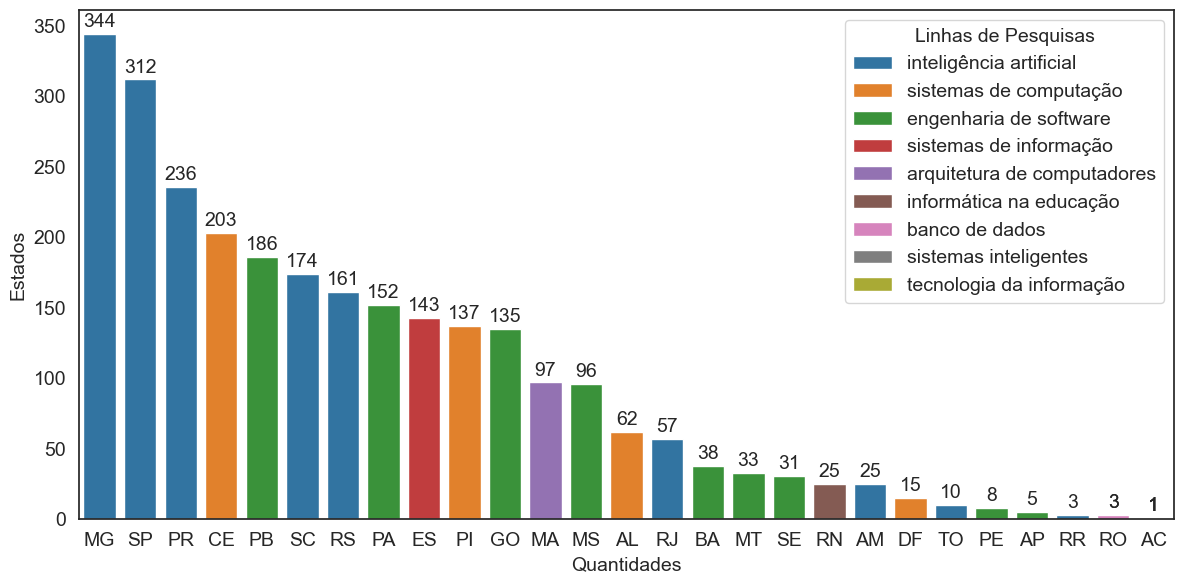

In [103]:
visualizacao.barplot_view(result_df.sort_values(['counts'], ascending=False), 
                          x='ESTADO', y='counts', hue='ESPECIALIDADE', figsize=(12,6), dodge=False,
                         save_path='../imagens/especialidades_estados.png', title_legend='Linhas de Pesquisas', xlabel="Quantidades",
                         ylabel="Estados")

#### Pegar as mais predominantes

In [104]:
df = data_poscomp_esp.copy()

contagem_valores = df['ESPECIALIDADE'].value_counts()

# Identifica valores que ocorrem menos de 100 vezes
valores_a_renomear = contagem_valores[contagem_valores <= 109].index

# Define o novo valor (categoria) para as áreas com contagem menor que 100
novo_valor = 'Demais áreas'

# Renomeia as áreas com contagem menor que 100 para 'Outras Áreas'
df.loc[df['ESPECIALIDADE'].isin(valores_a_renomear), 'ESPECIALIDADE'] = novo_valor

# Agora, as áreas com contagem menor que 100 foram renomeadas para 'Outras Áreas'
df.ESPECIALIDADE.value_counts()

ESPECIALIDADE
inteligência artificial                  1828
engenharia de software                   1619
sistemas de computação                   1368
Demais áreas                              834
redes de computadores                     832
sistemas de informação                    620
computação aplicada                       492
banco de dados                            448
aprendizado de máquina                    310
otimização                                300
metodologias e técnicas de computação     263
visão computacional                       222
sistemas embarcados                       208
sistemas inteligentes                     206
modelagem computacional                   205
arquitetura de computadores               198
computação visual                         196
ciência de dados                          183
informática na educação                   136
processamento paralelo e distribuído      135
tecnologia da informação                  134
computação gráfica  

In [105]:
df.shape

(10976, 39)

In [106]:
# plt.figure(figsize=(14, 10))

# # plot a bar chart
# sns.barplot(
#     y="ESPECIALIDADE", 
#     x=especialidades.index, 
#     data=especialidades, 
#     color='#69b3a2', 
# );
# plt.xticks(rotation=45);
# # plt.savefig('espec.png', dpi = 300, bbox_inches='tight')

In [107]:
# # Libraries
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.pyplot as plt
# import string

# text = data_poscomp['ESPECIALIDADE'].value_counts()
# text = text.to_dict()

# stopwords = set(['o', 'a', 'e', 'é', 'de', 'da', 'do', 'para', ' e'])

# # Create the wordcloud object
# wordcloud2 = WordCloud(background_color="white",
#                        # random_state=1, 
#                        min_word_length=3,
#                         width=4000, height=2000,
#                         stopwords=stopwords
#                        ).generate_from_frequencies(text)
# # WordCloud.generate_from_frequencies

# # Display the generated image:
# plt.imshow(wordcloud2, interpolation="bilinear")
# plt.axis("off")
# # plt.margins(x=0, y=0)
# plt.savefig('imagens/nuvem_palavras.eps', format='eps', dpi = 300, bbox_inches='tight')
# plt.show()

In [108]:
# import pandas as pd

# # Agrupa os dados por estado e conta a ocorrência de cada área
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# # Ordena os dados por estado e contagem em ordem decrescente
# contagem_areas = contagem_areas.sort_values(['ESTADO', 'CONTAGEM'], ascending=[True, False])

# # Obtém a área mais frequente para cada estado
# areas_mais_frequentes = contagem_areas.groupby('ESTADO').first().reset_index()

# # Exibe o resultado
# print(areas_mais_frequentes)

In [109]:
# # Agrupa os dados por estado e conta a ocorrência de cada área
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# # Obtém a área mais frequente para cada estado
# areas_mais_frequentes = contagem_areas.sort_values('CONTAGEM', ascending=False).drop_duplicates('ESTADO')

# # Ordena os dados por contagem em ordem decrescente
# areas_mais_frequentes = areas_mais_frequentes.sort_values('CONTAGEM', ascending=False)

# # Plota o gráfico de barras
# plt.figure(figsize=(14, 7))
# ax = sns.barplot(data=areas_mais_frequentes, x='ESTADO', y='CONTAGEM', hue='ESPECIALIDADE',dodge=False )

# for p in ax.patches:
#     if not math.isnan(p.get_height()):
#         ax.annotate(int(p.get_height()),
#                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                     xytext=(0, 1),
#                     textcoords='offset points',
#                     ha='center',
#                     va='bottom',
#                     fontsize=18)

# ax.set_xlabel('Unidade Federativas', fontsize=18)
# ax.set_ylabel('Contagem', fontsize=18)
# # ax.set_title('Área mais Frequente por Estado', fontsize=16)
# ax.tick_params(axis='x', labelsize=18)
# ax.tick_params(axis='y', labelsize=18)
# legend = plt.legend(title='Linhas de pesquisas', fontsize=16, loc='upper right')
# legend.get_title().set_fontsize(18)
# plt.tight_layout()
# plt.savefig('imagens/especialidade_frequenteEstado.eps', format='eps', dpi = 600, bbox_inches='tight')
# plt.show()

In [110]:
# plt.figure(figsize=(18,10))
# sns.set_style(style='ticks')
# ax = sns.barplot(data=areas_mais_frequentes.sort_values(['candidatos'], ascending=False),
#             y='candidatos',
#             x='ESTADO',
#             hue='REGIAO',
#             dodge=False,
#             # color='hsv'
#            )
# for p in ax.patches:
#     if not math.isnan(p.get_height()):
#         ax.annotate(int(p.get_height()),
#                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                     xytext=(0, 5),
#                     textcoords='offset points',
#                     ha='center',
#                     va='bottom',
#                     fontsize=16)
# plt.xlabel('Unidade Federativa', fontsize=18)
# plt.ylabel('Quantidade de participantes', fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# legend = plt.legend(title='Região', fontsize=16)
# legend.get_title().set_fontsize(18)
# # plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
# plt.show()

## Salvar os dados

In [111]:
# df.to_csv('../dados/dataset_poscomp.csv', index=False)